In [288]:
#Write a computer program (in any programming language of your choice) to solve the Poisson
#equation within the domain [0,1]
#∂u2/∂x2 + u = (π**2 + 1)sin(πx)

#The boundary conditions are given as,

#u(0) = 0
#u(1) = 0
#

In [640]:
#norm_infinte=[0.04791683990010842,0.011745288225749162,0.00292195546057461,0.0007295948612455749,0.0001823429009346622]   # for storing the L_infinte norm

In [1246]:
# ============== Program begins here ==================================
import numpy as np
import math as m
import matplotlib.pyplot as plt
import sys

num_mesh = 26                  # number of mesh points
bc       = 'Dirichlet'         # Boundary condition at the right boundary;
del_x    = 1.0/(num_mesh-1)        # mesh size 
xmesh    = np.zeros(num_mesh)        # Mesh points
uexact   = np.zeros(num_mesh)        #exact solution
u_jacobi = np.zeros(num_mesh)        # solution by jacobi method
error_jacobi=[]                      #error in jacobi method
iter_jacobi=[]                       #iteration count jacobi
u_gauss  = np.zeros(num_mesh)        # Solution by gauss-siedel method
error_gauss=[]                       #errror in gauss-siedel method
iter_gauss=[]                        #iteration count for gauss
u_sor    = np.zeros(num_mesh)        #  solution by sor method
error_sor =[]                        #error in sor method solution 
iter_sor=[]                          #iteration count for sor
u_est    = np.zeros(num_mesh)        # soltion by TDMA method



In [1247]:
# function to apply boundary condition
def apply_bc(u,num_mesh):
    u[0] = 0.0
    if bc == 'Dirichlet':
        u[num_mesh-1] = 0.0
    elif bc == 'Neumann':
        u[num_mesh-1] = u[num_mesh-2]
    else:
        sys.exit('Set correct boundary condition')

In [1248]:
# Diagonal elements of system matrix
d    = np.zeros(num_mesh)        # main diagonal elements
u    = np.zeros(num_mesh)        # upper diagonal
l    = np.zeros(num_mesh)        # lower diagonal

In [1249]:
# RHS of the discretized linear system of equation
f    = np.zeros(num_mesh)

# location of mesh points
for i in range(0, len(xmesh)):
    xmesh[i] = i * del_x
apply_bc(u_est,num_mesh)
apply_bc(u_jacobi,num_mesh)
apply_bc(u_gauss,num_mesh)
apply_bc(u_sor,num_mesh)
xmesh

array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
       0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
       0.88, 0.92, 0.96, 1.  ])

In [1250]:
#exact solution
for i in  range(0,num_mesh):
    uexact[i]=m.sin(xmesh[i]*m.pi)

In [1251]:
#intilization of values
s =  1/(del_x*del_x)
l[0] = 0.0
u[0] = 0.0
d[0] = 1.0
if bc == 'Dirichlet':
    l[num_mesh-1] = 0.0
    u[num_mesh-1] = 0.0
    d[num_mesh-1] = 1.0
f[0]=0
if bc == 'Dirichlet':
        f[num_mesh-1] = 0.0
for i in range(1,num_mesh-1 ):
    d[i] = 1.0+2.0*s
    l[i] = -s
    u[i] = -s

In [1252]:
for i in range(1, num_mesh-1):
        f[i] = ((m.pi)**2 +1)*(m.sin(xmesh[i]*m.pi))
       

In [1253]:
#formation of matrix system for solving the system of linear equations
A = np.zeros([num_mesh, num_mesh])
A[0,0]=1
A[num_mesh-1,num_mesh-1]=1
for i in range(1,num_mesh):
    A[i, i] = d[i]
    if i < num_mesh-1:
        A[i, i+1] = u[i]
    if i > 0:
        A[i, i-1] = l[i]


In [1254]:
#gauss sidel method as solver

iter = 0
converged=False
while converged==False:
            
                U_new = np.zeros(num_mesh)
                for i in range(0,num_mesh-1):
                        if i==0:
                              U_new[0]=0
                        elif i==num_mesh-1:
                                U_new[num_mesh-1]=0
                        else:    
                                U_new[i] = (f[i] - A[i, i+1]*u_gauss[i+1] - A[i, i-1]*U_new[i-1])/A[i, i]
                               

                
                norm = max(abs(U_new-u_gauss)) #  error
    
                iter = iter + 1
    
                if norm <0.00001:
                      converged=True
                      break
                error_gauss.append(norm) 
                iter_gauss.append(iter)
                print(iter, norm)
                # Soution not converged -- copy new value into old
                for i in range(0, len(u_gauss)):
                      u_gauss= U_new


1 0.017065465819647956
2 0.01677927488112895
3 0.016498630440395214
4 0.016223579664699707
5 0.01595407588931544
6 0.015690004795572823
7 0.015431209547459537
8 0.015177510522571352
9 0.01492871930806125
10 0.014684647957019265
11 0.014445114720704783
12 0.014209947312127352
13 0.013978475146034897
14 0.01375005893969819
15 0.013524280448617282
16 0.013300933747099397
17 0.013079963136588518
18 0.01286140340897629
19 0.01264533602001594
20 0.012431860562849673
21 0.012221077638928768
22 0.012013079377443225
23 0.011807944791065228
24 0.011605738054309644
25 0.011406508467027066
26 0.011210291328840771
27 0.011017109253182444
28 0.01082697364213242
29 0.01063988616335032
30 0.010455840143990813
31 0.010274821840812243
32 0.010099199896668243
33 0.009928101596601013
34 0.009759640440547723
35 0.009593804502431136
36 0.009430578257249578
37 0.009269943070557007
38 0.009111877638784738
39 0.008956358382290697
40 0.008803359794145649
41 0.008652854748227468
42 0.00850481477038334
43 0.00835

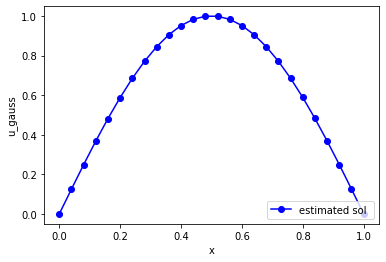

In [1255]:
#plot of calculated solution using gauss-siedel method
plt.plot(xmesh,u_gauss,'b-o')
plt.xlabel('x')
plt.ylabel('u_gauss')
plt.legend(["estimated sol "], loc ="lower right")
plt.show()


In [1256]:
#algorithm to solve the system of linear equation using TDMA
def Thomas_Algorithm(num, d, u, l, R, sol):
    d1    = np.zeros(num)
    r1    = np.zeros(num)
    d1[0] = d[0]
    r1[0] = R[0]
    for i in range(1, num-1):
        d1[i] = d[i] - l[i]*u[i-1]/d1[i-1]
        r1[i] = R[i] - r1[i-1]*l[i]/d1[i-1]
    sol[num-1]=R[num-1]/d[num-1]
    for i in range(len(d)-2,-1,-1):
        sol[i] = (r1[i]-u[i]*sol[i+1])/d1[i]


In [1258]:
#for the Q3 of the assignment
#Gauss-jacobi method as solver

iter2 = 0
converged=False
while converged==False:
            
                U_new2 = np.zeros(num_mesh)
                for i in range(0,num_mesh-1):
                        if i==0:
                              U_new2[0]=0
                        elif i==num_mesh-1:
                                U_new2[num_mesh-1]=0
                        else:    
                                U_new2[i] = (f[i] - A[i, i+1]*u_jacobi[i+1] - A[i, i-1]*u_jacobi[i-1])/A[i, i]
                               

                
                norm = max(abs(U_new2-u_jacobi)) #  error
    
                iter2 = iter2 + 1
    
                if norm <0.00001:
                      converged=True
                      break
                error_jacobi.append(norm) 
                iter_jacobi.append(iter2)
                
                # Soution not converged 
                for i in range(0,num_mesh):
                    u_jacobi[i]= U_new2[i]
    

[0.008671587305938252,
 0.008596332184205979,
 0.00852173015321098,
 0.008447775545199338,
 0.00837446274160391,
 0.008301786172617495,
 0.008229740316769651,
 0.00815831970050724,
 0.00808751889777852,
 0.00801733252962103,
 0.007947755263752812,
 0.007878781814167374,
 0.007810406940732026,
 0.007742625448789814,
 0.0076754321887649996,
 0.007608822055771486,
 0.0075427899892253625,
 0.007477330972460172,
 0.007412440032345952,
 0.007348112238911242,
 0.0072843427049687215,
 0.007221126585743726,
 0.007158459078506402,
 0.007096335422206529,
 0.007034750897112085,
 0.006973700824450535,
 0.006913180566053445,
 0.006853185524003935,
 0.006793711140287678,
 0.0067347528964462056,
 0.006676306313234015,
 0.0066183669502778986,
 0.006560930405739934,
 0.006503992315982948,
 0.006447548355238919,
 0.006391594235280296,
 0.006336125705094342,
 0.0062811385505602835,
 0.0062266285941287025,
 0.00617259169450457,
 0.0061190237463325525,
 0.006065920679884984,
 0.0060132784607528356,
 0.00596

In [1260]:
# SOR method to solve the equation
iter3=0
omega=1.5

converged=False
U_Sor=np.zeros(num_mesh)
apply_bc(U_Sor,num_mesh)
while converged==False:
    
    for i in range(1,num_mesh-1):
        U_Sor[i]=(1-omega)*U_Sor[i-1] + (omega/A[i][i])*(f[i]- A[i, i+1]*U_Sor[i+1] - A[i, i-1]*U_Sor[i-1])
    
    iter3=iter3+1
    norm=max(abs(U_Sor-u_sor))
    if norm<0.00001:
        converged=True
        break
    error_sor.append(norm)
    iter_sor.append(iter3)
    
    #if not converged
    for i in range(0,num_mesh):
        u_sor[i]=U_Sor[i]
    
        
  
    
         
        

array([0.        , 0.26676614, 0.35380313, 0.3790177 , 0.38161846,
       0.37471945, 0.36280255, 0.347513  , 0.32958102, 0.30945692,
       0.28751877, 0.26413771, 0.23969585, 0.21458809, 0.18921853,
       0.16399498, 0.1393228 , 0.11559864, 0.09320418, 0.07250016,
       0.05382065, 0.03746783, 0.0237072 , 0.01276341, 0.00481668,
       0.        ])

array([0.        , 0.1254043 , 0.24883226, 0.3683373 , 0.48203467,
       0.58813122, 0.68495363, 0.77097484, 0.84483812, 0.90537845,
       0.95164092, 0.9828958 , 0.99865002, 0.99865497, 0.98291041,
       0.95166449, 0.90540985, 0.84487579, 0.77101687, 0.68499776,
       0.58817495, 0.4820753 , 0.36837201, 0.24885819, 0.12541862,
       0.        ])

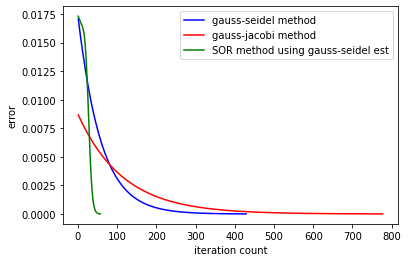

In [1263]:
##for q3 plot
""""Plot the convergence (error vs. iteration count) of all three iterative schemes in a sin-
gle figure: Jacobi, Gauss-Seidel, and Successive over-relaxation method"""

plt.plot(iter_gauss,error_gauss,'b-')
plt.plot(iter_jacobi,error_jacobi,'r-')
plt.plot(iter_sor,error_sor,'g-')
plt.xlabel('iteration count')
plt.ylabel('error')
plt.legend(["gauss-seidel method ","gauss-jacobi method","SOR method using gauss-seidel est"])
plt.show()

In [1188]:
"""q1 Plot the distribution of the computational solution and the exact solution for 11 and 51
#grid points using TDMA as the solver.
#uncommetn code and chnage grid points 
"""
#-------------------code for q1------------------
# Thomas_Algorithm(num_mesh, d, u, l, f,u_est)

# #For 11 grid points
# plt.plot(xmesh,uexact,'b-o')
# plt.plot(xmesh,u_est,'ro')
# plt.xlabel('x')
# plt.ylabel('u')
# plt.legend(["uexact","u_est"], loc ="lower right")

# plt.show()

SyntaxError: EOL while scanning string literal (2084324937.py, line 4)

In [1127]:
""""# for the Q2 analsis 
# to run the code uncomment it and change the mesh points according to mesh interval and arguments of thomas algorithm"""
#---------------code for Q2------------------------------
# mesh_interval=[4,8,16,32,64,128]
# new_delx=[]
# for i in range(0,6):
#     new_del=1/(mesh_interval[i])
#     new_delx.append(new_del)

# new_delx

# u_est1=np.zeros(5)
# u_est2=np.zeros(9)
# u_est3=np.zeros(17)
# u_est4=np.zeros(33)
# u_est5=np.zeros(65)
# u_est6=np.zeros(129)

# apply_bc(u_est1,len(u_est1))
# apply_bc(u_est2,len(u_est2))
# apply_bc(u_est3,len(u_est3))
# apply_bc(u_est4,len(u_est4))
# apply_bc(u_est5,len(u_est5))
# apply_bc(u_est6,len(u_est6))


# Thomas_Algorithm(num_mesh, d, u, l, f,u_est1)
# norm_inf=abs(max(u_est1-uexact))
# norm_infinte.append(norm_inf)

# plt.plot(new_delx,norm_infinte,'b-o',scaley=True)

# plt.xlabel('del_x')
# plt.ylabel('L_infinite norm')

# plt.show()


'"# for the Q2 analsis \n# to run the code uncomment it and change the mesh points according to mesh interval and arguments of thomas algorithm'